# Fire Incidents

### Objective

We want to use the dataset to predict the estimated dollar loss for fire incidents.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Load the dataset

In [2]:
fire_data = pd.read_csv('Fire-Incidents-Cleaned.csv')
fire_data.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24 17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24 07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Other,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09 18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30 00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Other,Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08 04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.511539,Other,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54


In [3]:
fire_data.shape

(11026, 27)

In [4]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11026 entries, 0 to 11025
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11026 non-null  object 
 1   Business_Impact                           11026 non-null  object 
 2   Civilian_Casualties                       11026 non-null  int64  
 3   Count_of_Persons_Rescued                  11026 non-null  int64  
 4   Estimated_Dollar_Loss                     11026 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11026 non-null  int64  
 6   Ext_agent_app_or_defer_time               11026 non-null  object 
 7   Extent_Of_Fire                            11026 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11026 non-null  object 
 9   Fire_Alarm_System_Operation               11026 non-null  object 
 10  Fire_Alarm_System_Presence        

Notice that the timestamp columns are now showing as object datatypes, so we will convert them to datatime.

In [5]:
fire_data['Ext_agent_app_or_defer_time'] = pd.to_datetime(fire_data['Ext_agent_app_or_defer_time'])
fire_data['Fire_Under_Control_Time'] = pd.to_datetime(fire_data['Fire_Under_Control_Time'])
fire_data['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(fire_data['Last_TFS_Unit_Clear_Time'])
fire_data['TFS_Alarm_Time'] = pd.to_datetime(fire_data['TFS_Alarm_Time'])
fire_data['TFS_Arrival_Time'] = pd.to_datetime(fire_data['TFS_Arrival_Time'])

In [6]:
time_data = fire_data[['Ext_agent_app_or_defer_time', 'Fire_Under_Control_Time', 'Last_TFS_Unit_Clear_Time',
                         'TFS_Alarm_Time', 'TFS_Arrival_Time']].copy()
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11026 entries, 0 to 11025
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ext_agent_app_or_defer_time  11026 non-null  datetime64[ns]
 1   Fire_Under_Control_Time      11026 non-null  datetime64[ns]
 2   Last_TFS_Unit_Clear_Time     11026 non-null  datetime64[ns]
 3   TFS_Alarm_Time               11026 non-null  datetime64[ns]
 4   TFS_Arrival_Time             11026 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 430.8 KB


We want to predict a continuous variable and we will use the Linear Regression. For us to apply the machine learning algorithm, we have to change the dataset to contain only numerical columns. We will focus on encoding our categorical columns and converting the datetime columns.

### Encoding the categorical data

We will use the Ordinal Encoder. From the documentation of sklearn, LabelEncoder is for converting target variable while OrdinalEncoder is for converting the categorical features.

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
# Creating a instance of Ordinal Encoder.
ordinalencoder = OrdinalEncoder()

In [9]:
# Creating a list of all the categorical features

cols = ['Area_of_Origin', 'Business_Impact', 'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
        'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 'Ignition_Source', 'Material_First_Ignited',
        'Method_Of_Fire_Control', 'Possible_Cause', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
        'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival']

In [10]:
# Fit ordinal encoder and return encoded label

fire_data[cols] = ordinalencoder.fit_transform(fire_data[cols])
fire_data.head(10)

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,16.0,4.0,0,86,3000,0,2018-08-24 17:06:26,0.0,4.0,0.0,...,-79.412479,14.0,2.0,19.0,8.0,4.0,1.0,3.0,2018-08-24 16:49:36,2018-08-24 16:54:09
1,2.0,6.0,0,28,50000,28,2018-11-24 07:19:00,1.0,4.0,1.0,...,-79.530419,12.0,3.0,18.0,9.0,4.0,2.0,1.0,2018-11-24 07:09:12,2018-11-24 07:14:23
2,11.0,5.0,1,16,1000000,130,2017-02-09 18:02:13,8.0,5.0,1.0,...,-79.373460,14.0,2.0,19.0,8.0,4.0,1.0,5.0,2017-02-09 17:45:07,2017-02-09 17:48:49
3,22.0,0.0,0,12,1000000,14,2012-10-30 00:52:04,3.0,6.0,2.0,...,-79.393700,14.0,2.0,19.0,9.0,4.0,4.0,4.0,2012-10-30 00:42:01,2012-10-30 00:44:58
4,19.0,5.0,8,11,125000,2,2018-07-08 04:35:00,8.0,5.0,1.0,...,-79.511539,9.0,2.0,14.0,8.0,4.0,2.0,2.0,2018-07-08 04:08:50,2018-07-08 04:13:54
5,5.0,4.0,0,11,100000,0,2019-02-18 10:26:25,0.0,3.0,3.0,...,-79.399979,3.0,2.0,2.0,2.0,4.0,3.0,5.0,2019-02-18 10:19:01,2019-02-18 10:23:27
6,13.0,1.0,0,11,30000,13,2015-03-07 04:49:35,1.0,4.0,1.0,...,-79.429400,9.0,2.0,2.0,9.0,4.0,1.0,2.0,2015-03-07 04:38:13,2015-03-07 04:44:28
7,2.0,4.0,8,11,50000,40,2014-06-09 16:15:00,1.0,3.0,3.0,...,-79.443970,2.0,2.0,17.0,8.0,6.0,0.0,2.0,2014-06-09 16:05:44,2014-06-09 16:09:50
8,11.0,6.0,0,10,250000,10,2014-03-20 02:03:11,8.0,6.0,2.0,...,-79.398640,14.0,2.0,19.0,12.0,6.0,4.0,3.0,2014-03-20 01:53:12,2014-03-20 01:57:58
9,9.0,5.0,2,10,450000,200,2011-02-16 00:44:00,10.0,5.0,1.0,...,-79.350870,3.0,2.0,2.0,8.0,4.0,2.0,2.0,2011-02-15 23:22:11,2011-02-15 23:26:53


### Converting the datetime for the linear regression

In [11]:
import datetime as dt

In [12]:
fire_data['Ext_agent_app_or_defer_time'] = fire_data['Ext_agent_app_or_defer_time'].map(dt.datetime.toordinal)
fire_data['Fire_Under_Control_Time'] = fire_data['Fire_Under_Control_Time'].map(dt.datetime.toordinal)
fire_data['Last_TFS_Unit_Clear_Time'] = fire_data['Last_TFS_Unit_Clear_Time'].map(dt.datetime.toordinal)
fire_data['TFS_Alarm_Time'] = fire_data['TFS_Alarm_Time'].map(dt.datetime.toordinal)
fire_data['TFS_Arrival_Time'] = fire_data['TFS_Arrival_Time'].map(dt.datetime.toordinal)

In [13]:
time_data_1 = fire_data[['Ext_agent_app_or_defer_time', 'Fire_Under_Control_Time', 'Last_TFS_Unit_Clear_Time',
                         'TFS_Alarm_Time', 'TFS_Arrival_Time']].copy()
time_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11026 entries, 0 to 11025
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Ext_agent_app_or_defer_time  11026 non-null  int64
 1   Fire_Under_Control_Time      11026 non-null  int64
 2   Last_TFS_Unit_Clear_Time     11026 non-null  int64
 3   TFS_Alarm_Time               11026 non-null  int64
 4   TFS_Arrival_Time             11026 non-null  int64
dtypes: int64(5)
memory usage: 430.8 KB


Now that our dataset is ready, we will plot a heatmap to see the correlation between the features an the target variables.

<AxesSubplot:>

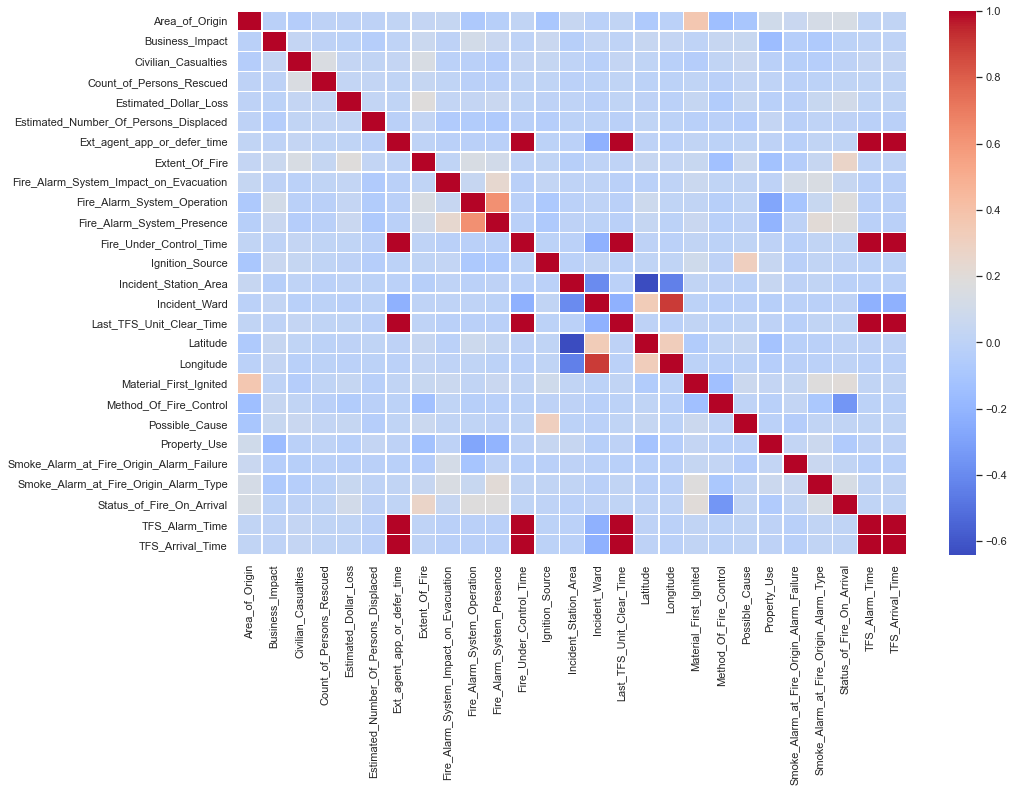

In [14]:
plt.subplots(figsize=(15,10))
sns.heatmap(fire_data.corr(), linewidths = 0.5, cmap = 'coolwarm')

We notice that our target vaiable (Estimated Dollar Loss) does not have a strong positive or negative correlation with other features. However, we will filter out some features we think does not help to predict the target variable.

In [15]:
fire_data.drop(['Ext_agent_app_or_defer_time', 'Incident_Station_Area', 'Incident_Ward', 
                'Last_TFS_Unit_Clear_Time', 'Latitude', 'Longitude', 'Material_First_Ignited', 
                'Method_Of_Fire_Control', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 
                'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival', 'TFS_Alarm_Time', 
                'TFS_Arrival_Time'], axis=1, inplace=True)
fire_data.shape

(11026, 14)

/Users/hadassah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Estimated_Dollar_Loss', ylabel='Density'>

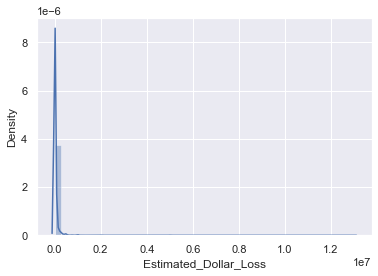

In [16]:
# We want to see the probability distribution function (PDF) of a the target variable.

sns.distplot(fire_data['Estimated_Dollar_Loss'])

The target variable has an exponential distribution, so we will transform it.

In [17]:
# Let's transform 'Price' with a log transformation
Estimated_Dollar_Loss_Log = np.where(fire_data['Estimated_Dollar_Loss']!=0,
                                     np.log(fire_data['Estimated_Dollar_Loss']),  0)

/Users/hadassah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
fire_data['Estimated_Dollar_Loss'] = Estimated_Dollar_Loss_Log
fire_data

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Possible_Cause,Property_Use
0,16.0,4.0,0,86,8.006368,0,0.0,4.0,0.0,0.0,736930,19.0,19.0,8.0
1,2.0,6.0,0,28,10.819778,28,1.0,4.0,1.0,0.0,737022,12.0,18.0,9.0
2,11.0,5.0,1,16,13.815511,130,8.0,5.0,1.0,0.0,736369,19.0,19.0,8.0
3,22.0,0.0,0,12,13.815511,14,3.0,6.0,2.0,3.0,734806,19.0,19.0,9.0
4,19.0,5.0,8,11,11.736069,2,8.0,5.0,1.0,0.0,736883,10.0,14.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11021,20.0,4.0,0,0,0.000000,0,0.0,0.0,1.0,0.0,736748,19.0,6.0,8.0
11022,13.0,4.0,0,0,6.907755,0,0.0,0.0,1.0,0.0,736749,4.0,2.0,4.0
11023,13.0,4.0,0,0,0.000000,0,0.0,0.0,1.0,0.0,736749,2.0,10.0,4.0
11024,16.0,5.0,6,0,11.512925,1,1.0,0.0,1.0,0.0,736749,17.0,6.0,8.0


/Users/hadassah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Estimated_Dollar_Loss', ylabel='Density'>

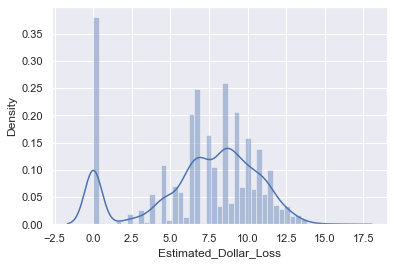

In [19]:
# Let's see the new distribution after transformation

sns.distplot(fire_data['Estimated_Dollar_Loss'])

## Machine Learning - Linear Regression Model

### Declare the Dependent and the Independent Variables

In [20]:
# We declare the features and the target.

X = fire_data.loc[:, fire_data.columns != 'Estimated_Dollar_Loss']
y = fire_data['Estimated_Dollar_Loss']

### Scale the data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the independent variables (calculate the mean and standard deviation feature-wise)
scaler.fit(X)

StandardScaler()

In [22]:
# Scale the features and store them in a new variable (the actual scaling procedure)

X_scaled = scaler.transform(X)

### Split the data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 365)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8820, 13), (2206, 13), (8820,), (2206,))

### Fitting Multiple Linear Regression Model to Training Set

In [25]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
# Let's check the outputs of the regression, that is, we want to predict the Train set results.

y_pred = reg.predict(X_train)
y_pred

array([ 8.25023616, 11.6790686 ,  6.65041658, ...,  9.96583873,
        7.54232864,  5.51737381])

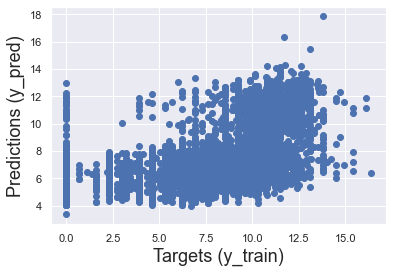

In [27]:
# We use a scatter plot to compare the targets (y_train) and the predictions (y_pred)

plt.scatter(y_train, y_pred)

plt.xlabel('Targets (y_train)', fontsize=18)
plt.ylabel('Predictions (y_pred)', fontsize=18)

plt.show()

In [28]:
# Evaluating the model. We find the R-squared of the model.

reg.score(X_train,y_train)

0.2731650793778789

In [29]:
# To find the Adjusted R-squared

r2 = reg.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2 = 1 -(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.2720920775645599

The Adjusted R-squared is less than the R-squared, and this means that one or more of the features have little or no significance in predicting the Estimated Dollar Loss.

In [30]:
# Create a regression summary where we can compare the features by their coefficients

reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Area_of_Origin,-0.556371
1,Business_Impact,-0.164027
2,Civilian_Casualties,0.197662
3,Count_of_Persons_Rescued,0.091370
4,Estimated_Number_Of_Persons_Displaced,0.188827
5,Extent_Of_Fire,1.546175
6,Fire_Alarm_System_Impact_on_Evacuation,-0.146625
7,Fire_Alarm_System_Operation,0.321344
8,Fire_Alarm_System_Presence,0.044245
9,Fire_Under_Control_Time,0.157171


A positive weight shows that as a feature increases in value, so does the 'Estimated Dollar Price', while a Negative weight shows that as a feature decreases in value, 'Estimated Dollar Price' decrease .

### Testing

In [31]:
# Our test inputs are 'X_test', while the outputs are 'y_test', we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_pred_test = reg.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_test)
print("The R-Squared score of our model is {}%".format(r2_score))

The R-Squared score of our model is 0.2531726444481649%


In [33]:
from sklearn.metrics import mean_squared_error
import math
rmse_score = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("The Root Mean Squared Error of our Model is {}".format(rmse_score))

The Root Mean Squared Error of our Model is 3.072005334549751


In [34]:
# Finally, let's manually check these predictions using the actual Estimated Dollar Loss

df = pd.DataFrame(np.exp(y_pred_test), columns=['Prediction'])
df.head()

,Prediction
0,281.886997
1,2035.590489
2,1328.881526
3,419.059338
4,995.804393


In [35]:
df['Actual'] = np.exp(y_test)
df

,Prediction,Actual
0,281.886997,NaN
1,2035.590489,NaN
2,1328.881526,NaN
3,419.059338,NaN
4,995.804393,NaN
...,...,...
2201,2258.558304,NaN
2202,462.751529,NaN
2203,555.614663,NaN
2204,9406.288202,NaN


In [36]:
# After displaying y_test, we find what the issue is the old indexes are preserved
# Therefore, to get a proper result, we must reset the index and drop the old indexing

y_test = y_test.reset_index(drop=True)
y_test.head()

0     0.000000
1     8.517193
2     0.000000
3     4.605170
4    11.512925
Name: Estimated_Dollar_Loss, dtype: float64

In [37]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price

df['Actual'] = np.exp(y_test)
df

,Prediction,Actual
0,281.886997,1.0
1,2035.590489,5000.0
2,1328.881526,1.0
3,419.059338,100.0
4,995.804393,100000.0
...,...,...
2201,2258.558304,3000.0
2202,462.751529,250.0
2203,555.614663,150.0
2204,9406.288202,20000.0


Additionally, we can calculate the difference between the actual values and the predictions, also called Residuals.
 
 Residuals are the difference between the actual and predicted values. You can think of residuals as being a distance. So, the closer the residual is to zero, the better our model performs in making its predictions.

In [38]:
df['Residual'] = df['Actual'] - df['Prediction']

In [39]:
# We want to see how far off we are from the result percentage-wise

df['Difference%'] = np.absolute(df['Residual']/df['Actual']*100)
df

,Prediction,Actual,Residual,Difference%
0,281.886997,1.0,-280.886997,28088.699730
1,2035.590489,5000.0,2964.409511,59.288190
2,1328.881526,1.0,-1327.881526,132788.152583
3,419.059338,100.0,-319.059338,319.059338
4,995.804393,100000.0,99004.195607,99.004196
...,...,...,...,...
2201,2258.558304,3000.0,741.441696,24.714723
2202,462.751529,250.0,-212.751529,85.100611
2203,555.614663,150.0,-405.614663,270.409775
2204,9406.288202,20000.0,10593.711798,52.968559


## Conclusion

We notice that the Estimated Dollar Loss does not have a causal relationship with most of the features in the dataset. It is even clearly seen from the heatmap we plotted. This may be because the data was not collected from only businesses but from every fire incidents that occured in Toronto in that time.